In [1]:
import pandas as pd
df = pd.read_csv("/Users/mustainbillah/MBillah/AI,ML,DL/code/dataset-Abhishek Thakur/winequality-red.csv")

In [2]:
df.shape

(1599, 12)

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [5]:
quality_mapping = {
    3 : 0,
    4 : 1,
    5 : 2,
    6 : 3,
    7 : 4,
    8 : 5
}

In [6]:
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [8]:
# use sample with frac=1 to shuffle the dataframe and reset the indices
df = df.sample(frac=1).reset_index(drop=True)

In [9]:
# Take top 1000 rows for training
df_train = df.head(1000)

In [10]:
# take bottom 599 for test/validataion
df_test = df.tail(599)

### Modeling and training

In [11]:
# Importing decision tree and evaluation metric
from sklearn import tree
from sklearn import metrics

In [12]:
# Initialize decision tree classifier class with a max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=3)

In [13]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [14]:
# choosing the column that are the features for the model
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [15]:
# Train the model
clf.fit(df_train[cols], df_train["quality"])

DecisionTreeClassifier(max_depth=3)

### Testing Accuracy

In [16]:
# Generate prediction on train data
train_prediction = clf.predict(df_train[cols])

In [17]:
# Generate prediction on test data
test_prediction = clf.predict(df_test[cols])

In [18]:
# Calculate the accuracy of prediction on the training data set
train_accuracy = metrics.accuracy_score(df_train['quality'], train_prediction)

In [19]:
train_accuracy

0.606

In [20]:
# Calculate the accuracy of prediction on the testing data set
test_accuracy = metrics.accuracy_score(df_test.quality, test_prediction)

In [21]:
test_accuracy

0.5409015025041736

### Calculate the accuracies for different values of max_depth and ploting the accuracies

In [22]:
# Importing the libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
# this is our global size of label text on the plots
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

In [24]:
# initialize lists to store accuracies for training and test data
# start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

In [25]:
# iterate over a few depth values
for depth in range(1,25):
    # inisialzing the model
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    # fit the models
    clf.fit(df_train[cols], df_train.quality)
    # creating train and test predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    # Calculating train and test accuracies
    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    

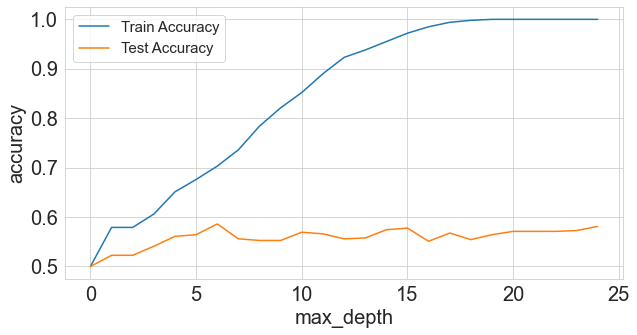

In [26]:
# Create two plot using matplotlib and seaborn
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.legend(loc='upper left', prop={'size': 15})
plt.xticks(range(0,26,5))
plt.xlabel('max_depth', size=20)
plt.ylabel('accuracy', size=20)
plt.show()

# Corss Validation

### k-fold cross validation

In [27]:
# K-fold cross validation
import pandas as pd
from sklearn import model_selection

In [28]:
# initiate/import the dataset
df = df_train

In [29]:
# Create a new colunm called kfold and fill it with -1
df["kfold"] = -1

In [30]:
# Randomize the rows of the data
df = df.sample(frac=1).reset_index(drop=True)

In [32]:
# Initiate the kfold class from model_selection module
kf = model_selection.KFold(n_splits=5)

In [33]:
# Fill the new kfold column
for fold, (trn_, val_) in enumerate(kf.split(X=df)):
    df.loc[val_, 'kfold'] = fold

In [34]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,9.6,0.420,0.35,2.1,0.083,17.0,38.0,0.99622,3.23,0.66,11.1,3,0
1,8.3,0.260,0.37,1.4,0.076,8.0,23.0,0.99740,3.26,0.70,9.6,3,0
2,10.1,0.280,0.46,1.8,0.050,5.0,13.0,0.99740,3.04,0.79,10.2,3,0
3,7.2,0.635,0.07,2.6,0.077,16.0,86.0,0.99748,3.51,0.54,9.7,2,0
4,7.5,0.640,0.00,2.4,0.077,18.0,29.0,0.99650,3.32,0.60,10.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.9,0.290,0.25,13.4,0.067,72.0,160.0,0.99721,3.33,0.54,10.3,3,4
996,7.7,0.715,0.01,2.1,0.064,31.0,43.0,0.99371,3.41,0.57,11.8,3,4
997,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.0,4,4
998,7.5,0.510,0.02,1.7,0.084,13.0,31.0,0.99538,3.36,0.54,10.5,3,4


In [36]:
# Save the new csv with kfold column
df.to_csv('train_fold.csv', index=False)

### Stratified k-fold cross validation for classification problems

* Use stratified kfold cross validation when dataset skewed for binary classification with 90% positive sample and only 10% negative sample
* #### The simple rule: If it is a standard classification problem, choose stratified k-fold cross validation

In [37]:
# Importing libraries
import pandas as pd
from sklearn import model_selection

In [38]:
# Initiate/import the dataset
df = df_train

In [40]:
# create a new column called kfold and fill it with -1
df['kfold'] = -1

In [42]:
# Randomize the rows of the data
df = df.sample(frac=1).reset_index(drop=True)

In [45]:
# Fetch target
y = df.quality.values

In [47]:
# Initiate the kfold class from model_selection module
kf = model_selection.StratifiedKFold(n_splits=5)

In [48]:
kf

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [57]:
# Fill the new kfold column
for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    df.loc[v_, 'kfold'] = f

In [58]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,8.1,0.870,0.00,2.2,0.084,10.0,31.0,0.99656,3.25,0.50,9.8,2,0
1,9.9,0.440,0.46,2.2,0.091,10.0,41.0,0.99638,3.18,0.69,11.9,3,0
2,8.0,0.250,0.43,1.7,0.067,22.0,50.0,0.99460,3.38,0.60,11.9,3,0
3,9.3,0.330,0.45,1.5,0.057,19.0,37.0,0.99498,3.18,0.89,11.1,4,0
4,6.3,0.360,0.19,3.2,0.075,15.0,39.0,0.99560,3.56,0.52,12.7,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.0,4,4
996,7.7,0.270,0.68,3.5,0.358,5.0,10.0,0.99720,3.25,1.08,9.9,4,4
997,8.3,0.600,0.13,2.6,0.085,6.0,24.0,0.99840,3.31,0.59,9.2,3,4
998,9.0,0.450,0.49,2.6,0.084,21.0,75.0,0.99870,3.35,0.57,9.7,2,4


In [59]:
# save the new csv with kfold column
df.to_csv('stratified_kfold', index=False)

Text(0, 0.5, 'count')

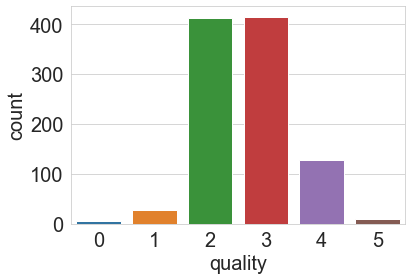

In [61]:
# Distribution of labels
b = sns.countplot(x='quality', data=df)
b.set_xlabel('quality', fontsize=20)
b.set_ylabel('count', fontsize=20)

# Stratified kfold cross validation for regression problem

* First divide the target into bins
* If there is a lot of samples then don't care about the number of bins(>10k, >100k)
* If there is not enough samples then apply Sturage's Rule to calculate the appropriate number of bins
* Number of bins = 1 + log2(N)

In [62]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import model_selection

In [63]:
def create_folds(data):
    # create a new column called kfold and fill it with -1
    data["kfold"] = -1
    
    # Randomize the rows of the data
    data = data.sample(frac=1).reset_index(drop=True)
    
    # Calculating the number of bins using Sturge's rule
    # Here, I used floor of the value also round can be used.
    num_bins = int(np.floor(1 + np.log2(len(data))))
    
    # bin targets
    data.loc[:, 'bins'] = pd.cut(
            data['target'], bins=num_bins, labels=False)
    
    # Initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    # fill the new kfold column
    # instead of targets, i used bins
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, 'kfold'] = f
        
    # Drop the bins column
    data = data.drop('bins', axis=1)
    
    # Return dataframe with folds
    return data

In [64]:
# Creating a new dataset with 15000 samples and 100 features and 1 target
X, y = datasets.make_regression(
        n_samples=15000, n_features=100, n_targets=1)

In [69]:
X.shape[0]

15000

In [70]:
# Create a dataframe out of the numpy arrays
df = pd.DataFrame(
    X, columns=[f"f_{i}" for i in range(X.shape[1])])
df.loc[:, 'target'] = y

In [72]:
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target
0,0.567818,-1.088858,-0.541702,-0.017444,2.171681,-0.745574,-0.760438,1.097818,-0.141468,0.282444,...,0.778205,-0.726581,-1.348858,-1.640221,0.803964,0.713150,-0.335231,-0.140904,-0.966350,230.506124
1,-1.358051,-0.921411,1.111009,-0.511737,-0.554728,-1.323754,-0.931592,-0.801062,1.841269,0.510368,...,-0.004626,-0.470916,1.381973,-0.555914,0.648000,1.068354,1.626621,1.408006,1.236404,257.585567
2,1.027468,1.057871,-0.814326,1.410160,-0.915567,-0.836006,1.320533,0.620836,-0.043599,-0.497979,...,-0.413666,0.637611,0.315928,0.781329,-1.836235,-0.185453,0.620109,-0.659297,-0.909159,-2.087058
3,-0.044529,-0.244557,-0.080483,0.692316,-0.205134,1.520890,-1.646409,1.252789,0.126743,0.311845,...,0.812532,-0.559558,0.371676,-0.164380,0.340497,-2.107036,0.250043,0.317035,-1.685692,86.208851
4,-0.825133,0.647888,1.752701,0.306751,0.142503,0.718014,-0.518517,-0.707745,-0.979709,0.334396,...,-1.408086,0.711758,0.720539,-0.819069,0.472566,-0.082897,-1.197539,-0.128635,0.997102,-152.109130


In [73]:
# Create folds
df = create_folds(df)

/Users/mustainbillah/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [75]:
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,kfold
0,-1.391151,-0.161864,1.114403,0.317168,-0.252770,0.112019,-0.723344,0.073989,-0.807292,-0.535132,...,-0.504928,-0.600287,1.910802,0.533419,-0.945547,-1.382444,-1.537385,0.059296,-521.783459,0
1,2.238123,0.688969,-1.233756,1.441200,1.098812,-1.267411,-0.124123,0.378069,-0.731074,0.503051,...,-1.079567,-0.770708,-0.177993,-0.140416,0.400215,-0.907716,0.006155,1.127626,-25.151995,0
2,-0.519463,-0.823211,0.014271,0.327249,-1.309386,0.673035,-0.762650,-0.689878,0.285251,-0.599711,...,-0.667149,1.423191,0.554713,-0.836502,-0.697712,1.725718,0.548840,-0.231598,-219.396035,0
3,0.953836,0.870898,0.085805,0.111429,0.315109,-0.205038,0.178998,0.555300,1.533849,-0.947299,...,0.113099,-0.069150,1.779062,-0.311663,-0.386587,0.970161,-2.163495,-1.110139,-112.532801,0
4,0.927844,0.552322,-1.546919,-0.310760,0.084161,0.358479,1.084074,-0.425201,0.315359,-0.531378,...,0.053442,0.018481,-0.700843,0.046214,-0.831651,-0.413998,-0.783134,0.189199,-31.366764,0
